# Latar Belakang

Housing Prices Dataset merupakan data set yang terdiri dari 545 baris dan 13 kolom yang berisi tentang data rumah secara detail mulai dari harga, area, sampai fasilitas yang terdapat pada masing-masing rumah. Daata ini merupakan data tipe data regressi yang dapat menyelesaikan projek prediksi. Tujuan projek ini adalah untuk membuat mesin prediksi harga rumah, sehingga pengguna memeiliki gambaran akan harga rumah impiannya sebelum menyusun pembelian. 

Beberapa variabel yang umumnya terdapat dalam dataset ini dan dapat dianalisis antara lain:
1. price : Selling price of the house.
2. area	: Total area of the house (in square feet).
3. bedrooms	: Number of bedrooms in the house.
4. bathrooms : Number of bathrooms in the house.
5. stories : Number of stories (floors) in the house.
6. mainroad : Whether the house is located on a main road.
7. guestroom : Whether the house has a guestroom.
8. basement : Whether the house includes a basement.
9. hotwaterheating : Whether the house has hot water heating.
10.airconditioning : Whether the house has air conditioning.
11.parking : Number of car parking spaces available.
12.prefarea : Whether the house is in a preferred residential area.
13.furnishingstatus : Furnishing level of the house: furnished, semi-furnished, or unfurnished

# Import Library

In [2]:
import numpy as np # untuk perhitungan statistik
from numpy import mean # mencari nilai mean
import pandas as pd #membaca, pembersihan, analisis data 
import matplotlib.pyplot as plt # visualisasi data
%matplotlib inline
import seaborn as sns # membuat grafik dan statistik
from sklearn.preprocessing import LabelEncoder, StandardScaler #pemrosesan data
from sklearn import preprocessing # pemrosesan data
from sklearn.model_selection import train_test_split # membagi data menjadi dua, yaitu data testing dan training 
from sklearn import datasets
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris

import warnings
warnings.filterwarnings("ignore")

print('Import Library Berhasil')

Import Library Berhasil


# Loading Data Set

In [4]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Melihat ukuran data (baris, kolom)

In [6]:
df.shape

(545, 13)

# Pengecekan Nama Kolom

In [8]:
df.columns.values

array(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype=object)

# Descriptif Statsitik

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Tipe Data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Cek Duplikat

In [14]:
df.duplicated().sum()

0

# Pengecekan Missing Value

In [16]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Cek Outlier

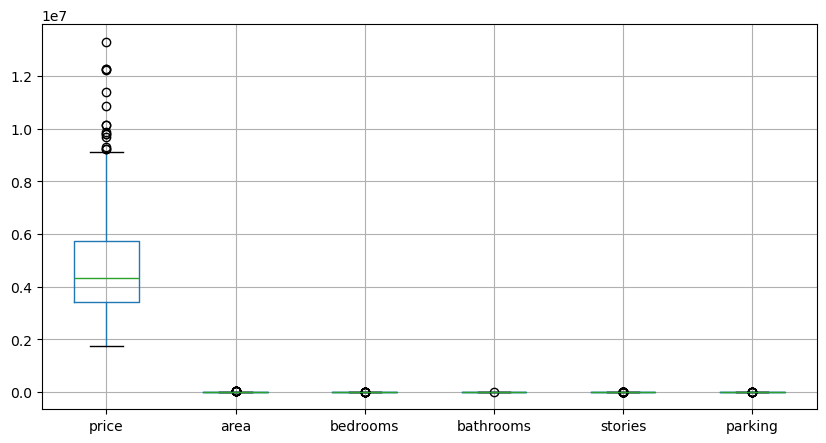

In [18]:
#membuat boxplot outlier
plt.figure(figsize=(10,5))

df.boxplot()

plt.show()

Terdapat outlier pada kolom **Price** maka akan di hapuskan outliernya 

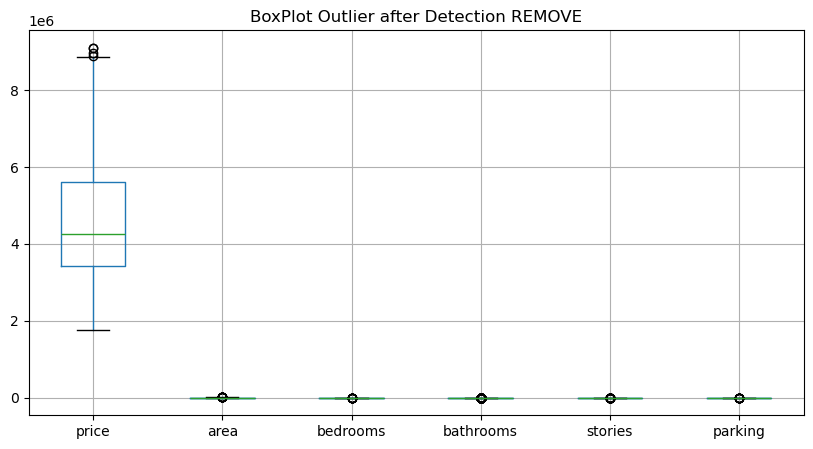

In [82]:
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outlier = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df_no_outlier

df_no_outlier= df.copy()

df_no_outlier = remove_outliers(df_no_outlier, 'price')

plt.figure(figsize=(10,5))
df_no_outlier[["price","area","bedrooms","bathrooms","stories","parking"]].boxplot()
plt.title("BoxPlot Outlier after Detection REMOVE")
plt.show()

# Pre Processing Data (Process Continuous Features)

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df_no_outlier2 = df_no_outlier.copy()

In [24]:
df_no_outlier2["mainroad"]=encoder.fit_transform(df_no_outlier2["mainroad"])
df_no_outlier2["guestroom"]=encoder.fit_transform(df_no_outlier2["guestroom"]) 
df_no_outlier2["basement"]=encoder.fit_transform(df_no_outlier2["basement"])
df_no_outlier2["hotwaterheating"]=encoder.fit_transform(df_no_outlier2["hotwaterheating"])
df_no_outlier2["prefarea"]=encoder.fit_transform(df_no_outlier2["prefarea"])
df_no_outlier2["airconditioning"]=encoder.fit_transform(df_no_outlier2["airconditioning"])
df_no_outlier2["furnishingstatus"]=encoder.fit_transform(df_no_outlier2["furnishingstatus"])

In [25]:
df_no_outlier2

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,2
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


# Seleksi Fitur 

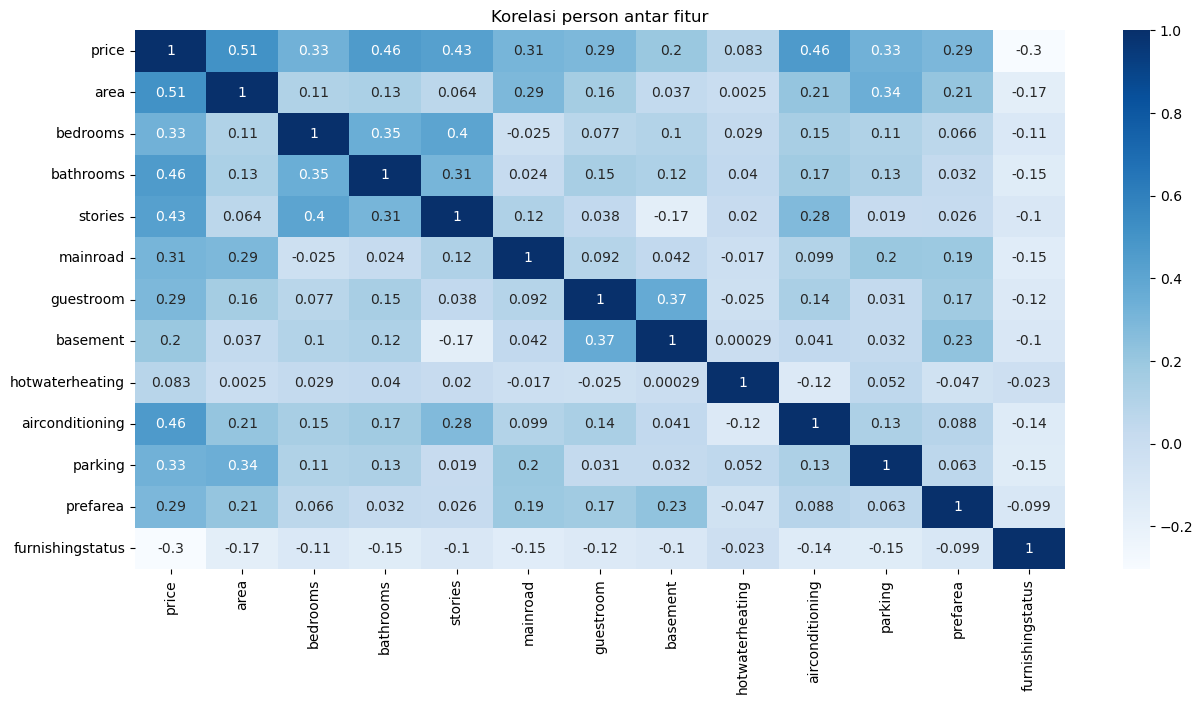

In [94]:
#korelasi pearson
plt.figure(figsize=(15,7))
sns.heatmap(df_no_outlier2.corr(),annot=True, cmap='Blues')
plt.title("Korelasi person antar fitur")
plt.show()

Pada correlation map di atas setelah dilakukan encoding, terdapat hasil korelasi yang bagus dan agak bagus:
Hasil korelasi yang memiliki korelasi positif adalah hubungan antara **Price** dengan **area**,  dan **airconditioning**. Lalu hubungan **bathrooms** dan **stories**, hubungan antara area dengan **parking**, hubungan antara **basement** dengan **guestroom**.

In [29]:
df_new = df_no_outlier2.copy()
df_new = df_no_outlier2[["price","area","airconditioning","bathrooms","stories","parking","basement","guestroom"]]

In [30]:
df_new

,price,area,airconditioning,bathrooms,stories,parking,basement,guestroom
15,9100000,6000,0,1,2,2,1,0
16,9100000,6600,1,2,2,1,1,1
17,8960000,8500,1,2,4,2,0,0
18,8890000,4600,1,2,2,2,0,1
19,8855000,6420,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...
540,1820000,3000,0,1,1,2,1,0
541,1767150,2400,0,1,1,0,0,0
542,1750000,3620,0,1,1,0,0,0
543,1750000,2910,0,1,1,0,0,0


# Standarisasi

In [32]:
from sklearn.preprocessing import StandardScaler

colom_pisah = ["airconditioning","bathrooms","stories","parking","basement","guestroom"]

#kolom yang akan di standarisasi
standarisasi_kolom = [col for col in df_new.columns if col not in colom_pisah]

scaler = StandardScaler()

#standarisasi
df_new[standarisasi_kolom] = scaler.fit_transform(df_new[standarisasi_kolom])

In [33]:
df_new

,price,area,airconditioning,bathrooms,stories,parking,basement,guestroom
15,2.821586,0.452609,0,1,2,2,1,0
16,2.821586,0.741976,1,2,2,1,1,1
17,2.733790,1.658306,1,2,4,2,0,0
18,2.689893,-0.222581,1,2,2,2,0,1
19,2.667944,0.655166,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...
540,-1.743786,-0.994226,0,1,1,2,1,0
541,-1.776929,-1.283593,0,1,1,0,0,0
542,-1.787684,-0.695214,0,1,1,0,0,0
543,-1.787684,-1.037631,0,1,1,0,0,0


# Pelatihan Machine Learning

In [35]:
x = df_new.drop(columns=["price"])
y = df_new["price"]

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [38]:
rasio = [0.2,0.3,0.4]

In [39]:
#model
model_rfc = RandomForestRegressor(n_estimators=100, random_state=42)

In [40]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_rfc
    
    #melatih model
    #model.fit(x_train, y_train)

    model.fit(x_train, y_train)

    
    #menghitung sisi dari pelatihan
    y_pred_train =  model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test =  model.predict(x_test)

    print(f"R2_score pelatihan Random Forest rasio {i} adalah : {r2_score(y_pred_train,y_train)}")

R2_score pelatihan Random Forest rasio 0.2 adalah : 0.91661875712394
R2_score pelatihan Random Forest rasio 0.3 adalah : 0.9227598778209787
R2_score pelatihan Random Forest rasio 0.4 adalah : 0.9176181495825938


## Linear Regresi

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
model_lr = LinearRegression()

In [44]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_lr
    
    #melatih model
    #model.fit(x_train, y_train)

    model.fit(x_train, y_train)

    
    #menghitung sisi dari pelatihan
    y_pred_train =  model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test =  model.predict(x_test)

    print(f"R2_score pelatihan Linear Regresi {i} adalah : {r2_score(y_pred_train,y_train)}")

R2_score pelatihan Linear Regresi 0.2 adalah : 0.3456847550237455
R2_score pelatihan Linear Regresi 0.3 adalah : 0.3749782681240157
R2_score pelatihan Linear Regresi 0.4 adalah : 0.4046295165168923


## Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor 

In [47]:
model_gbr = GradientBoostingRegressor(random_state=42)

In [48]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_gbr
    
    #melatih model
    #model.fit(x_train, y_train)

    model.fit(x_train, y_train)

    
    #menghitung sisi dari pelatihan
    y_pred_train =  model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test =  model.predict(x_test)

    print(f"R2_score pelatihan Gradient Boosting rasio {i} adalah : {r2_score(y_pred_train,y_train)}")

R2_score pelatihan Gradient Boosting rasio 0.2 adalah : 0.7010607433695308
R2_score pelatihan Gradient Boosting rasio 0.3 adalah : 0.7481834822758464
R2_score pelatihan Gradient Boosting rasio 0.4 adalah : 0.7899169713364891


# Kesimpulan

Dari projek yang telah dibuat dapat disimpulkan bahwa : Data yang digunakan berisi 545 baris 13 kolom, setelah melakukan data loading dan dilanjutkan dengan explorasi data dan pelatihan machine learning.

Dari 13 kolom yang ada, Price (harga rumah) merupakan target yang ingin diprediksi dengan memprediksi harga rumah dengan melihat area dan segara fasilitas rumah yang tersedia. 

Variabel yng dipilih untuk digunakan sebagai feature dalam pembuatan model adalah area, airconditioning, bathrooms, stories , parking, basement, dan guestroom.

Dalam pengembangan model dicoba dengan tiga algoritma klasifikasi yaitu Random Forest, Linear Regressi, dan Gradient Boosting. Dari semua algoritma yang telah dicoba tidak semua memberikan hasil yang baik. Dari percobaan Random Forest memberikan akurasi terbaik pada rasio 0.3 dengan akurasi pelatihan 93%. Sedangkan algoritma gradient bossting memberikan akurasi terbaik pada rasio 0.4 dengan akurasi pelatihan 78%. Selanjutnya algoritma Linear Regresi tidak mengghasilkan akurasi pelatihan yang bagus semua nilai akurasi berada dibawah nilai 50 %.